# Linear Models

## Gradient Descent

Gradient decent is a generic optimization algotithm capable of finding optimal solutions to a wide range of problems. 
- The general idea of GD is to tweak parameters iteratively in order to minimize a cost function
    - Example of costs function: MSE, log_loss, etc.

Not all costs functions look like nice, regular bowls. Fortnately, the MSE cost function for a linear regression happens to be a convex function, impliyng that there are no local minima, just one global minimum.

- Just in this case, GD is guaranteed to approach closely to the global minimum (if you wait long enough and if the learning rate is not too high)

When using a GD, you should ensure that all features have a similar scale (e.g. StandarScaler)

### Batch Gardient Descent

To implement GD, you need to compute the gradient of the cost function (e.g. RMS) with regard to each model parameter θ. --> Partial derivatives, how much the cost function will change if you change θ. 

For multiple parameters --> gradient vector (vector with all partial derivatives)

Batch GD implies using the full training set X, to calculate the gradient vector, which mught be slow on a very large training set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

X_b = add_dummy_feature(X) 

In [2]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [3]:
theta

array([[4.21509616],
       [2.77011339]])

We need to find a good learning rate but also set a good number of epochs

Example of different learning rates

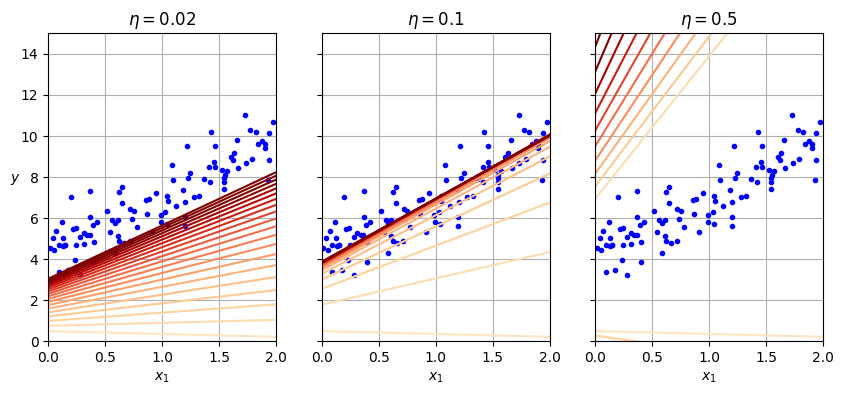

In [4]:
import matplotlib as mpl

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) 

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()

n = 0.1 looks pretty good, in just a few epochs, it has already converged to the solution

We could use GridSearch for finding a good learning rate. Limit the number of epochs so that grid serach can eliminate models that take too long to converge

### Stochastic Gradient Descent

The main problem to Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step

SGD picks a random instance in the training set at every ste and computes the gradients based only on that instance, which makes it much faster

- Randomness --> instead of gently decreasing to reach the minimum, the cost function will bounce up and down, decreasing only on average. Thus, the final parameters will be good but not optimal.
- One solution to this dilema is to gradually reduce the learning rate

For gradually reducing the learning rate we can create a learning schedule function:

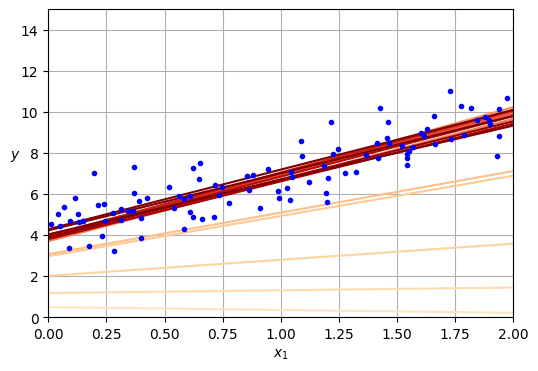

In [5]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) 

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        


plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [6]:
theta

array([[4.21076011],
       [2.74856079]])

In [7]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [8]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Logistic Regression

Logistic regression can be used for classification. 

- It is commonly used to estiamte the probability that an instance belongs to a particular class.
- If the estimated probability is grater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class

### Estimating Probabilities

Logistic Functiion = σ(t) = 1 / 1 + e ^(-t)

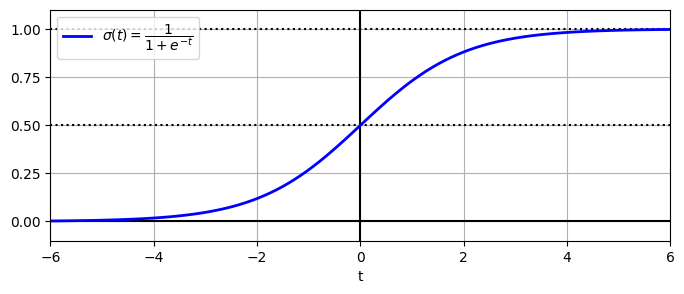

In [9]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()

plt.show()

p̂ = ho (x) = σ (θ^T x) ;  p̂ ∈ [0, 1]

- y_hat = 0 (negative class) if  p̂ < 0.5
- y_hat = 1 (positive class) if  p̂ > 0.5

### Training and Cost Function

Training: the objetive is to set the parameter vector θ so that the model estiamtes high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).

- This idea is capture by the cost function:
    - c(θ) = -log (p̂) if y=1
    - c(θ) = -log (1 - p̂) if y = 0

    - This translates into the cost beeing large if the model estimates a probability close to 1 for a negative instance, and close to 0 for a positive instance
    - The cost will be close to 0 otherwise, which is what we want

The cost function (log loss) over the whole training set is the average cost over all training instances.
- When using a log loss, we are assuming that the instances follow a Gaussian distribution around the mean of their class!!! if otherwise, the model can be biased

### Decision Boundaries

In [10]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's split the data and train a logisstic regression model on the tranning set

- Logistic regression is used as a binary classifer, positive class = virginica; negative class = otherwise

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Let's look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm

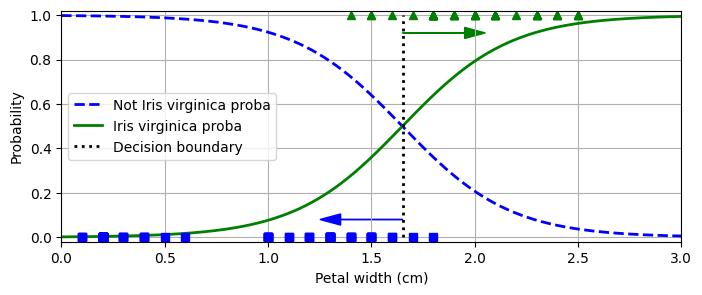

In [15]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")


plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [16]:
decision_boundary

1.6516516516516517

There is a decision boundary at around 1.6 cm where bouth probabilities are equal to 50%. We can see by using predict() instead of predict_proba, which will return the most likely class.

In [17]:
log_reg.predict([[1.66], [1.64]])

array([ True, False])

Let's now display two features: petal width and lenght

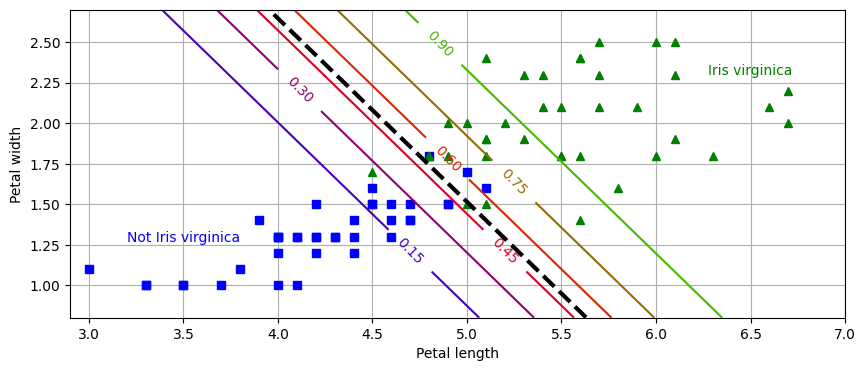

In [18]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()

The dashed line represents the points where the model estimates 50% probability 
 - 50% is the model decision boundary

### SGD on Logistic Regression

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# We create the logistic regression classifier using SGD; log_loss for logistic regression and penalty='l2' for regularization
sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5, eta0=0.01, n_iter_no_change=100, random_state=42)

# Accuracy on cross validation
scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')

np.mean(scores)


0.9454545454545453

Adjusting the learning rate "eta" with GridSearch and RandomizedSearch (Chapter 2)

In [20]:
from sklearn.model_selection import RandomizedSearchCV

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5,
                        n_iter_no_change=100, random_state=42)

param_dist = {
    'eta0': np.logspace(-5, 0, 20)  # Test values from 1e-5 to 1
}

random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, 
                                   n_iter=10, cv=10, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best eta0: {random_search.best_params_['eta0']}")
print(f"Best accuracy: {random_search.best_score_:.4f}")

Best eta0: 1e-05
Best accuracy: 0.9455


In [21]:
from sklearn.model_selection import GridSearchCV

sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, tol=1e-5,
                        n_iter_no_change=100, random_state=42)


param_grid = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1]  # Different learning rates to test
}


grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Best eta0: {grid_search.best_params_['eta0']}")
print(f"Best accuracy: {grid_search.best_score_:.4f}")


Best eta0: 0.0001
Best accuracy: 0.9455


In [22]:
grid_search.best_estimator_

SGDClassifier(eta0=0.0001, loss='log_loss', n_iter_no_change=100,
              random_state=42, tol=1e-05)

# Support Vector Machines

SVM is capable of performing linear or nonlinear classification, regression and novelty detection.
It shines with small to medium-sized nonlinear datasets (hundreds to thousands instances), especially for classification tasks.

## Linear SVM Classification

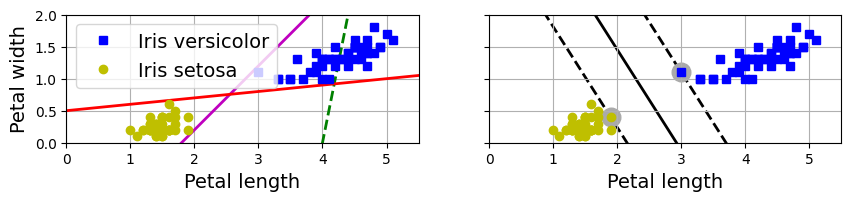

In [24]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

- The left image represents 3 possible linear classifiers. The dashed one is clearly bad and the other two come so close to the instances, that will probably not perform well on the test set or new instances.

- In contrast, on the left we have a SVM classifier fitting the widest possible street (large margin classification).

Notice that adding more training instances "off the street" will not affect the decision boundary at all.

- The boundary is fully supported by the instances located on the edge of the street.

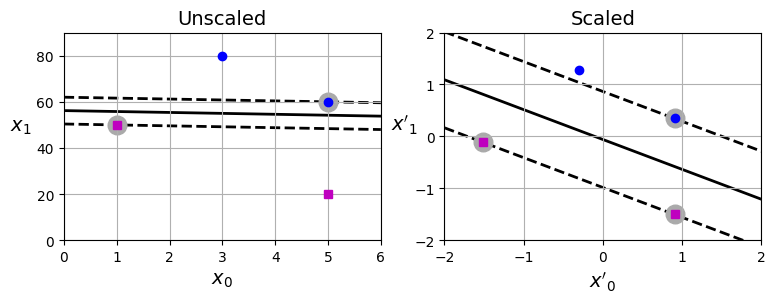

In [25]:
from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

SVMs are sensitive to the feature scales, as you can see

### Soft Margin Classification

Hard Margin Classification: 

We strcitly impose that all instances must be off the street and on the correct side. There are two main issues:

1. It only works if the data is linearly separable.
2. Sensitive to outliers as seen below

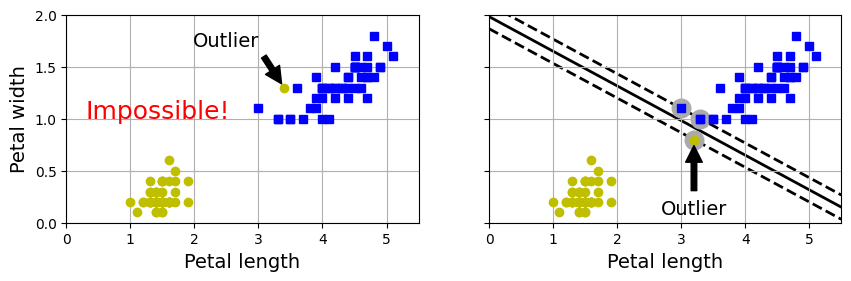

In [26]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

Soft Margin Classification:

A more flexible model. Find a good balance between keeping the street as large as possible and limiting the margin violations.

SVM using Scikit-Learn:

hyperparameter C: reducing C makes the street larger, but leads to more margin violations. Reducing C, reduces the risk of overfitting but also increases the risk of underfitting. 


Training a linear SVM classifier to detect Iris virginica, setting C = 1. 

- The pipeline first scales the data then uses LinearSVC.

In [27]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [28]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

The first plant (petal lenght = 5.5 cm and petal width = 1.7 cm) is classified as Iris virginica, while the second is not.

In [29]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

The scores or decision function on a SVM classifier, represents the distance between each instance and the decision boundary. 

You could use SVC class instead of Linear SVC to fit an extra model at the end of the map and get the predict_proba function for the class probability, but it will slow down training considerably

/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_3254/177775967.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_3254/177775967.py:24: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()


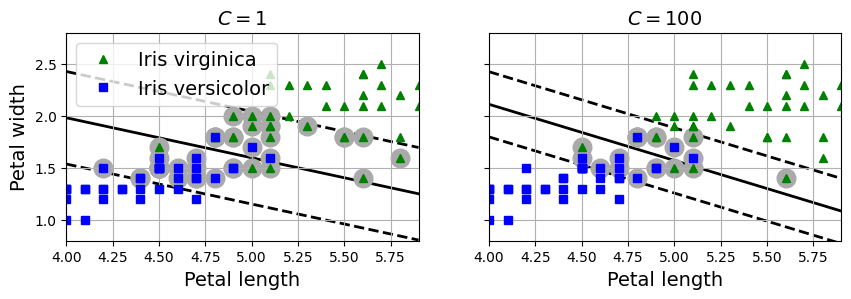

In [30]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

## Non Linear SVM Classification

Linear SVM classifiers are efficient and often work suprisingly well. However, many datasets are not even close to being linearly separable.

Adding features to make a dataset linearly separable --> e.g polynomial features

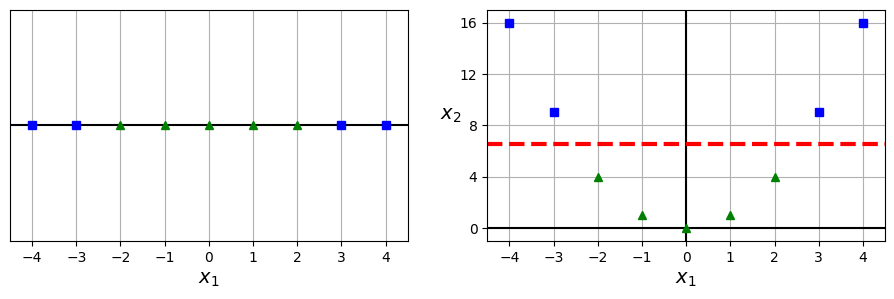

In [31]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

To implement this idea, you can create a pipeline containing a PolynomialFeatures transformer followed by a StandardScaler and a Linear SVC classifier. Let's do this on the moons dataset

In [32]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3), # 3rd degree polynomial
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

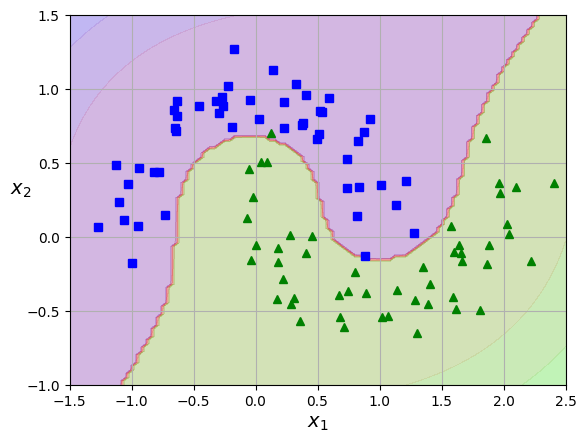

In [33]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### Polynomial Kernel

The kernel trick makes ir possible to get the same result as if you had added many polynomial features, even with a very high degree, without actually having to add them. 

There will be not combinatorial explosion of the number of features.

In [34]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

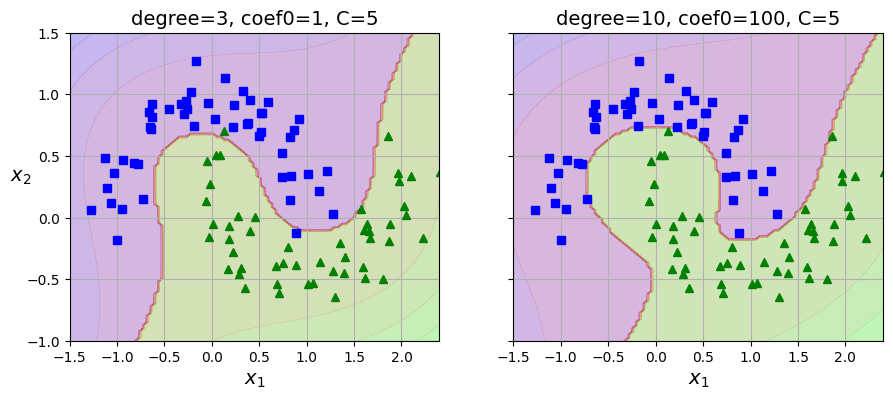

In [35]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

On the left hand side we have a SVM model using a 3rd degree polynomial kernel, while on the right a 10th degree one. If your model is overfitting, you might want to reduce the polynomial degree and vice versa. coef0 controls how much the model is influenced by high-degree terms versus low ones

Using Randomized search for hyperparameters

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))


param_distributions = {
    'svc__degree': [2, 5, 10, 15], 
    'svc__coef0': randint(low=0, high=150), 
    'svc__C': randint(low=0, high=15) 
}



random_search = RandomizedSearchCV(poly_kernel_svm_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc',
                                              SVC(C=5, coef0=1,
                                                  kernel='poly'))]),
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1219fdbb0>,
                                        'svc__coef0': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1219fcd40>,
                                        'svc__degree': [2, 5, 10, 15]},
                   random_state=42, scoring='accuracy')

In [41]:
print("Best hyperparameters:")
print(random_search.best_params_)


print("Best accuracy:")
print(random_search.best_score_)

Best hyperparameters:
{'svc__C': 4, 'svc__coef0': 102, 'svc__degree': 5}
Best accuracy:
0.95


### Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures hoy much each instance resembles a particular landmark (landmark = reference point).

Similarity funtion --> bellshaped curve with the mean = reference point.

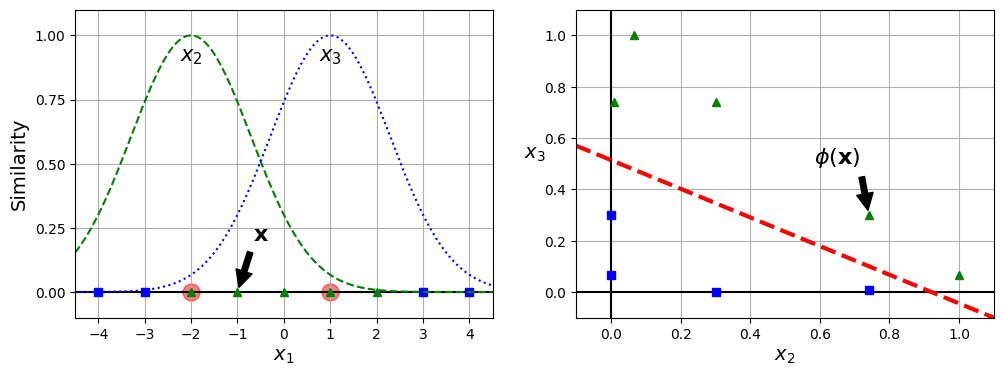

In [42]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

### Gaussian RBF Kernel

The kernel trick once again does its SVM magic, make it possible to obtain similar resultsas if youu had added many similarity features without actually doing so

In [43]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

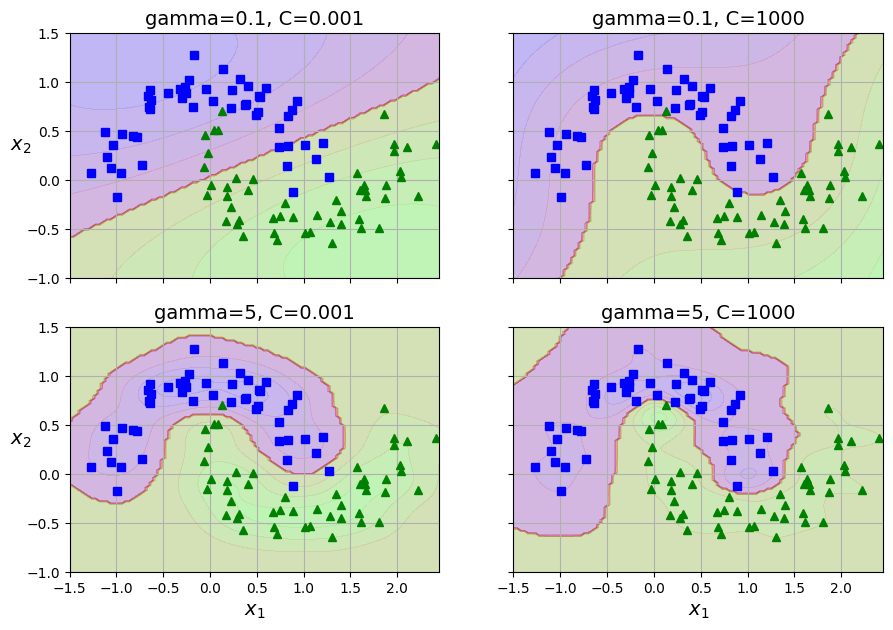

In [44]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

Increasing gamma makes the bell-shaped curve narrower, so each instance's range of influence is smaller. If the model is overfitting you should reduce gamma and increase it if its underfitting.

In [56]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))

param_distributions = {
    'svc__gamma': randint(low=0, high=10), 
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

random_search = RandomizedSearchCV(rbf_kernel_svm_clf, param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(C=0.001, gamma=5))]),
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000, 10000],
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x121195eb0>},
                   random_state=42, scoring='accuracy')

In [57]:
print("Best hyperparameters:")
print(random_search.best_params_)


print("Best accuracy:")
print(random_search.best_score_.round(2))

Best hyperparameters:
{'svc__C': 10, 'svc__gamma': 3}
Best accuracy:
0.98


# Decision Trees

Decision Trees can perform classification, regression tasks, and even multioutput tasks.

Decision Trees are also the fundamental components of random forests which are among the most powerful ML algorithms available today.

## Training a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
y_iris.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [18]:
X_iris.shape

(150, 2)

## Making Predictions